In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('Analysis.csv')

In [7]:
dataset.head()

,Unnamed: 0,Genotypes,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
0,0,(Gulabi X B’lore Purple),0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000
1,1,Alden,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000
2,2,Aledo,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333
3,3,Amber Sweet,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333
4,4,Arka Chitra,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             75 non-null     int64  
 1   Genotypes              75 non-null     object 
 2   PruningBiomass         75 non-null     float64
 3   TimeofBudbrust         75 non-null     float64
 4   Timeoffullbloom        75 non-null     float64
 5   Time of verasion       75 non-null     float64
 6   ABW                    75 non-null     float64
 7   BW                     75 non-null     float64
 8   BD                     75 non-null     float64
 9   BL                     75 non-null     float64
 10  TSS                    75 non-null     float64
 11  Acidity                75 non-null     float64
 12  Compaactness           75 non-null     float64
 13  Skinfirmness           75 non-null     float64
 14  Bunlen                 75 non-null     float64
 15  peduncle

In [9]:
dataset.drop(['Unnamed: 0'], axis=1 , inplace = True)

In [46]:
x =dataset.iloc[:, 1:-1].values

In [47]:
x

array([[  0.32766667,   9.        ,  38.33333333, ...,  32.93333333,
        127.        ,   4.20333333],
       [  2.13766667,  10.        ,  35.33333333, ...,  25.23333333,
        116.66666667,  11.83666667],
       [  0.91266667,  10.66666667,  39.66666667, ...,  22.06666667,
        141.66666667,   5.39      ],
       ...,
       [  0.51433333,  13.33333333,  32.66666667, ...,  16.2       ,
        136.33333333,   6.84666667],
       [  0.67      ,  11.        ,  31.        , ...,   6.66666667,
        126.33333333,   5.85      ],
       [  0.785     ,   9.        ,  31.33333333, ...,   8.        ,
        134.66666667,   6.99333333]])

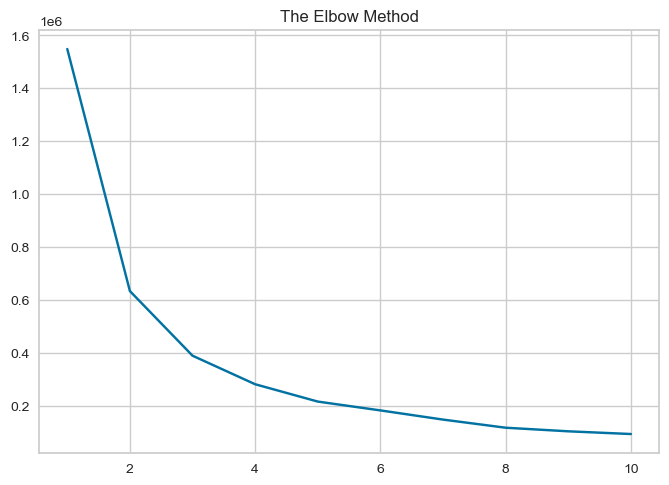

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')

plt.show()

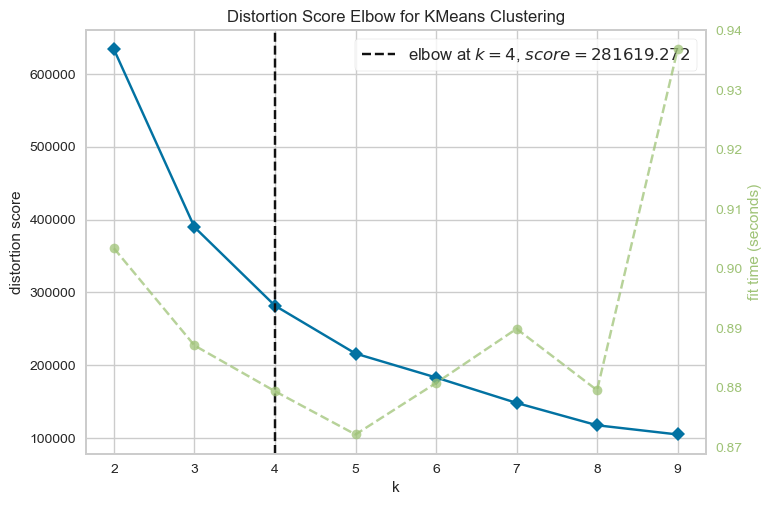

In [49]:
from yellowbrick.cluster import  KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(x)
visualizer.show()
plt.show()

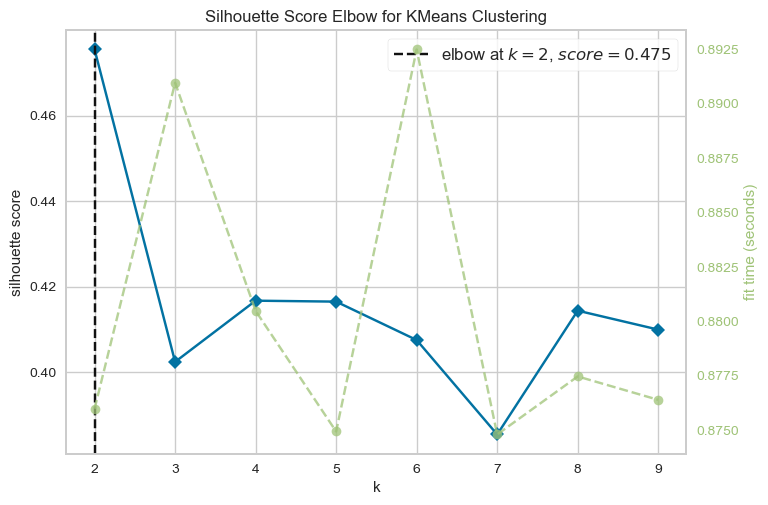

In [50]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(x)
visualizer.show()
plt.show()

In [29]:
wcss

[1548675.4988771027,
 633728.9723335957,
 389484.3166055911,
 281619.27183995704,
 216104.98213043675,
 182709.50350006868,
 147997.12582130023,
 117289.0107300931,
 103700.26083316017,
 93435.31531109526]

In [57]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1])

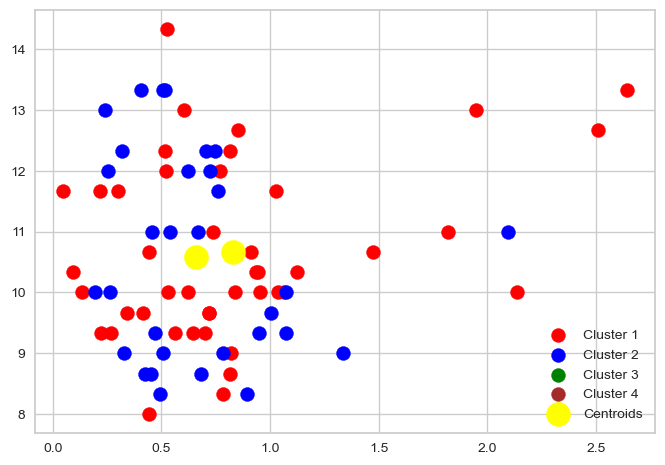

In [58]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()